<a href="https://colab.research.google.com/github/SGhuman123/Data-Science-Portfolio/blob/main/Hotels_Analytics_Project/PoC_model_to_predict_hotel_cancellations/PoC_model_to_predict_hotel_cancellations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About

We need to develop a Proof of Concept (PoC) model to predict potential cancellations. We use the input dataset `hotel_bookings_2.csv`, we need to:


a. Perform a detailed exploratory data analysis on the dataset through tabular
outputs, graphical visualizations, and other approach(es) we deem fit.

  * Elaborate on our findings.
  * Identify the peak seasons (the granularity of the time horizon is to be chosen by us - the time resolution can be in week, day, or month).
  
b. Utilise feature engineering to capture the following, but not limited to that
described below, in the dataset used for modelling:
  * Boolean feature for new customers who have booked rooms in the resort on weekdays.
  * Boolean feature of singles or couples without children/babies who have booked rooms with a non-refundable deposit.
  * Propose and implement at least one additional feature with justification.
  
c. Build one or more machine learning model(s) utilising the provided dataset to
predict reservation cancellations. We need to:

  * Provide a clear definition of reservation cancellation, i.e. which data column is to be used as the target variable and which categories are considered “cancellations”.
  * Clearly explain the steps/approach taken to build the machine learning model, including any pre-processing steps undertaken to parse strings and categorical variables, approach to feature selection (if any), additional features to be generated, training and testing procedures, the algorithm chosen, and model evaluation metrics. We shall use one or more algorithms and/or perform hyperparameter tuning to improve the model performance.

# Predicting Potential Cancellations using Machine Learning

In this notebook, we attempt to build a machine learning model capable of predicting whether or not someone has would cancel their bookings.

We're shall take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## What is classification?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.

## What we'll end up with

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

| <img src="https://dev.mrdbourke.com/zero-to-mastery-ml/images/ml101-6-step-ml-framework.png" width=500/> |
|:--:|
| 6 Step Machine Learning Modelling Framework |

More specifically, we'll look at the following topics.

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

| <img src="https://dev.mrdbourke.com/zero-to-mastery-ml/images/ml101-6-step-ml-framework.png" width=500/> |
|:--:|
| Tools which can be used for each step of the machine learning modelling process. |

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy.

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things).

This is because we're going to be using a number of different **features** (pieces of information) about whether a person is likely to cancel their hotel booking or not.

> Understanding these features will help us prioritize customers based on their likelihood to cancel, enabling the hotel to allocate resources more effectively, enhance customer retention strategies, and provide personalized service to those less likely to cancel.



## 2. Data

What we'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original database contains 39 attributes, but here only 31 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a hotel guest different booking information attributes and the dependent variable is whether or not their booking is cancelled.


## 3. Evaluation

The evaluation metric is something we might define at the start of a project.

Since machine learning is very experimental, we might say something like,

> If we can reach 95% accuracy at predicting whether or not a guest would cancel their booking during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.


## 4. Features

Features are different parts of the data. During this step, we'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**. A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

This is where we'll get different information about each of the features in your data. The following are the features we'll use to predict our target variable (booking is cancelled or not).



### **Logical reasoning behind data dictionary**

Prior to coming up with our data dictionary we need to think logically of the features that would realistically affect how likely a guest is going to cancel their hotel booking.

To determine which columns might impact the `is_canceled` column, we can identify potential factors based on the context of the hotel industry and the booking process. Here are some columns that are likely to have an impact:

1. **is_nric**: Guests who are Singaporean residents might have different cancellation rates compared to foreign tourists, possibly due to local familiarity with the hotel or travel flexibility.

2. **is_passport**: Foreign tourists may have higher cancellation rates due to travel uncertainties like visa issues, flight cancellations, or other travel disruptions.

3. **membership_id**: Members might be less likely to cancel due to loyalty programs and incentives.

4. **hotel**: Cancellation rates might differ between Bristol Hotel and Botanical Hotel due to differences in location, services, or reputation.

5. **lead_time**: Bookings made well in advance might have higher cancellation rates as plans change over time compared to last-minute bookings.

6. **arrival_date_year**: Yearly trends, such as economic conditions or global events, can influence cancellation rates.

7. **arrival_date_month**: Seasonal trends can impact cancellations, with certain months having higher cancellation rates due to holidays or weather conditions.

8. **arrival_date_week_number**: Specific weeks of the year, like holiday weeks, might see different cancellation patterns.

9. **arrival_date_day_of_month**: Specific dates might have higher or lower cancellation rates due to events or holidays.

10. **stays_in_weekend_nights**: Bookings including weekends might have different cancellation rates compared to weekday-only bookings due to weekend plans being more likely to change.

11. **stays_in_week_nights**: Similar to weekend nights, but weekday bookings might have lower cancellation rates due to business travel consistency.

12. **adults**: The number of adults might impact cancellation likelihood, with larger groups possibly having higher cancellation rates due to coordination difficulties.

13. **children**: Families with children might have higher cancellation rates due to unforeseen circumstances like illness.

14. **babies**: Similar to children, having babies might increase the likelihood of cancellations.

15. **meal**: The type of meal plan chosen might indicate the purpose of the trip (e.g., leisure vs. business) and affect cancellation rates.

16. **country**: Country of origin might influence cancellation rates due to travel regulations, cultural differences, or economic conditions.

17. **market_segment**: Different market segments, like travel agents versus tour operators, might have varying cancellation rates based on booking policies.

18. **distribution_channel**: The booking distribution channel could impact cancellations, with direct bookings possibly having lower cancellation rates compared to third-party channels.

19. **previous_cancellations**: A history of previous cancellations might indicate a higher likelihood of future cancellations.

20. **previous_bookings_not_canceled**: A history of not canceling bookings might indicate a lower likelihood of future cancellations.

21. **reserved_room_type**: Certain room types might be more prone to cancellations due to cost or desirability.

22. **assigned_room_type**: Differences between reserved and assigned room types might lead to cancellations if guests are dissatisfied with the change.

23. **booking_changes**: Multiple booking changes might indicate uncertainty and a higher likelihood of cancellation.

24. **deposit_type**: Bookings with non-refundable deposits might have lower cancellation rates compared to those with no deposit or refundable deposits.

25. **agent**: The travel agency involved might influence cancellations based on their booking policies and customer service.

26. **company**: Similar to agents, the company responsible for the booking might impact cancellation rates based on their travel policies.

27. **days_in_waiting_list**: Bookings that spent more time on the waiting list might have higher cancellation rates due to uncertainty.

28. **customer_type**: Different customer types, such as group bookings versus transient bookings, might have different cancellation rates.

29. **adr** (Average Daily Rate): Higher rates might correlate with higher cancellation rates due to the cost sensitivity of guests.

30. **required_car_parking_spaces**: Guests requiring parking might have lower cancellation rates due to the commitment indicated by this request.

31. **total_of_special_requests**: A higher number of special requests might indicate a higher level of commitment and lower cancellation rates.



> *While the usage columns (exercise_use, work_use, breakfast_use, spa_use, tourism_use) are interesting for understanding guest behavior during their stay, they are less likely to directly impact the is_canceled column as they relate to actions taken after check-in rather than before.*
>
> *guest_details column has no significant value.*
>
> *Also reservation_status column is directly related to our target column of is_canceled so we should remove it.*
>
> *Also reservation_status_date has no causal or strong logical link to is_canceled so we should remove it.*

### **Create data dictionary**

1. is_nric (bool) -	Value indicating if the reservation or booking was made by a Singaporean resident (1) or not (0)
2. is_passport (bool)	- Value indicating if the reservation or booking was made by a foreign tourist (1) or not (0)
4. membership_id (varchar) -	Membership ID of the guest (if applicable)
5. hotel	(varchar) -	Hotel (Bristol Hotel or Botanical Hotel)
5. is_canceled (bool) - Value indicating if the booking was canceled (1) or not (0)


> is_canceled is our target variable or the value we are trying to predict.


6. lead_time (int) - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
7. arrival_date_year (int) -	Year of arrival date
8. arrival_date_month	(varchar) - Month of arrival date
9. arrival_date_week_number (int) - Week number of year for arrival date
10. arrival_date_day_of_month (int) - Day of arrival date
11. stays_in_weekend_nights (int) - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
12. stays_in_week_nights (int) - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
13. adults (int)	- Number of adults
14. children (int) -	Number of children
15. babies	(int) -	Number of babies
16. meal (varchar) -	"Type of meal booked. Categories are presented in standard hospitality meal packages:
    - Undefined/SC – no meal package
    - BB – Bed & Breakfast
    - HB – Half board (breakfast and one other meal – usually dinner)
    - FB – Full board (breakfast, lunch and dinner)"
17. country	(varchar) -	Country of origin. Categories are represented in the ISO 3155–3:2013 format
18. market_segment (varchar) -	Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
19. distribution_channel (varchar) - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
20. previous_cancellations (int) -	Number of previous bookings that were cancelled by the customer prior to the current booking
21. previous_bookings_not_canceled (int) -	Number of previous bookings not cancelled by the customer prior to the current booking
22. reserved_room_type (varchar) -	Code of room type reserved. Code is presented instead of designation for anonymity reasons.
23. assigned_room_type (varchar) - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
24. booking_changes (int) -	Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
25. deposit_type (varchar) -	Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
  - No Deposit – no deposit was made;
  - Non -Refund – a deposit was made in the value of the total stay cost;
  - Refundable – a deposit was made with a value under the total cost of stay.
26. agent	(varchar) -	ID of the travel agency that made the booking
27. company	(varchar)	- ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
27. days_in_waiting_list (int) -	Number of days the booking was in the waiting list before it was confirmed to the customer
28. customer_type	(varchar) -	Type of booking, assuming one of four categories:   
    - Contract - when the booking has an allotment or other type of contract associated to it;
    - Group – when the booking is associated to a group;
    - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
    - Transient-party – when the booking is transient, but is associated to at least other transient booking
29. adr	(numeric)	- Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
30. required_car_parking_spaces	(int) -	Number of car parking spaces required by the customer
31. total_of_special_requests	(int) -	Number of special requests made by the customer (e.g. twin bed or high floor)


## Preparing the tools


* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulating.

In [1]:
# Import all the tools we need

# Regular EDA (explatory data analysis) and plotting libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# we want our plots to appear inside the notebook

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

There are many different kinds of ways to store data. The typical way of storing **tabular data**, data similar to what you'd see in an Excel file is in `.csv` format. `.csv` stands for comma seperated values.

Pandas has a built-in function to read `.csv` files called `read_csv()` which takes the file pathname of your `.csv` file. You'll likely use this a lot.

In [2]:
df = pd.read_csv("hotel_bookings_2.csv")
df.shape # (rows, columns)

(89945, 40)

## Data Exploration (exploratory data analysis or EDA)

Once we've imported a dataset, the next step is to explore. There's no set way of doing this. But what we should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to our **data dictionary** and remind ourselves of what different columns mean.


The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,guest_details,is_nric,is_passport,membership_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,exercise_use,work_use,breakfast_use,spa_use,tourism_use
0,TZY993BPZ579,Y,N,149638806.0,Bristol Hotel,0,342,2018,July,27,...,0.0,0,0,Check-Out,1/7/15,0,1,1,1,0
1,IZQ785QKG184,Y,N,757409305.0,Bristol Hotel,0,737,2018,July,27,...,0.0,0,0,Check-Out,1/7/15,0,1,0,1,0
2,HNF587VZE019,Y,N,NaN,Bristol Hotel,0,7,2018,July,27,...,75.0,0,0,Check-Out,2/7/15,1,1,0,0,0
3,LJK057QCH706,N,Y,NaN,Bristol Hotel,0,13,2018,July,27,...,75.0,0,0,Check-Out,2/7/15,1,1,1,1,0
4,WGX653AVC033,N,Y,NaN,Bristol Hotel,0,14,2018,July,27,...,98.0,0,1,Check-Out,3/7/15,0,1,0,0,0


In [4]:
df.tail()

,guest_details,is_nric,is_passport,membership_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,exercise_use,work_use,breakfast_use,spa_use,tourism_use
89940,XQQ049IXL095,N,Y,NaN,Botany Hotel,1,222,2020,August,35,...,117.0,0,3,Canceled,5/5/17,1,0,0,1,0
89941,DRK976WVW025,Y,N,583666371.0,Botany Hotel,1,177,2020,August,35,...,95.1,0,1,Canceled,26/7/17,1,1,1,0,1
89942,KCY129VAL094,Y,N,708238968.0,Botany Hotel,1,131,2020,August,35,...,165.0,0,0,Canceled,25/4/17,0,1,1,0,0
89943,NJT296OMT310,N,Y,NaN,Botany Hotel,1,155,2020,August,35,...,135.0,0,1,Canceled,4/4/17,1,1,1,0,0
89944,CKQ388KKK011,Y,N,661944679.0,Botany Hotel,1,155,2020,August,35,...,135.0,0,1,Canceled,4/4/17,1,0,0,1,1


One thing we want to do to our data set is to ensure it matches our data dictionary. As seen above the dataset does not match our data dictionary. As such,we have to drop the columns of **exercise_use**, **work_use**, **breakfast_use**, **spa_use**, **tourism_use** from our dataset.

In [5]:
# Drop the specified columns
columns_to_drop = ["guest_details", "exercise_use", "work_use", "breakfast_use", "spa_use", "tourism_use", "reservation_status_date", "reservation_status"]
df = df.drop(columns=columns_to_drop)

# Check the shape of the dataframe to confirm the columns have been dropped
df.shape # (rows, columns)

(89945, 32)

In [6]:
df.head()

,is_nric,is_passport,membership_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Y,N,149638806.0,Bristol Hotel,0,342,2018,July,27,1,...,Connecting Room,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Y,N,757409305.0,Bristol Hotel,0,737,2018,July,27,1,...,Connecting Room,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Y,N,NaN,Bristol Hotel,0,7,2018,July,27,1,...,Connecting Room,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,N,Y,NaN,Bristol Hotel,0,13,2018,July,27,1,...,Single,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,N,Y,NaN,Bristol Hotel,0,14,2018,July,27,1,...,Single,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


Columns have been successfuly dropped as seen above.

Let's first find the number of cancellations there are where:
* 1 - denotes booking was cancelled
* 0 - denotes booking was not cancelled

`value_counts()` allows you to show how many times each of the values of a **categorical** column appear.

In [7]:
# Let's find out how many of each cancellations and no cancellations there are
df["is_canceled"].value_counts();

We can plot the target column value counts by calling the `plot()` function and telling it what kind of plot we'd like, in this case, bar is good.

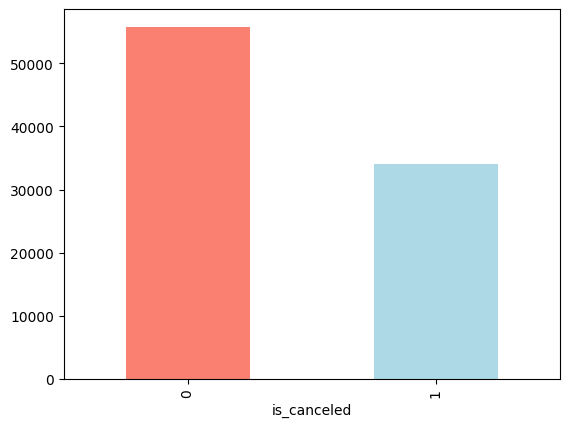

In [8]:
df["is_canceled"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

From the graph above we can see that there are more cases of non-cancellations over cancellations.

`df.info()` shows us a quick insight to the number of missing values you have and what type of data your working with.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_nric                         89945 non-null  object 
 1   is_passport                     89945 non-null  object 
 2   membership_id                   44913 non-null  float64
 3   hotel                           89945 non-null  object 
 4   is_canceled                     89945 non-null  int64  
 5   lead_time                       89945 non-null  int64  
 6   arrival_date_year               89945 non-null  int64  
 7   arrival_date_month              89945 non-null  object 
 8   arrival_date_week_number        89945 non-null  int64  
 9   arrival_date_day_of_month       89945 non-null  int64  
 10  stays_in_weekend_nights         89945 non-null  int64  
 11  stays_in_week_nights            89945 non-null  int64  
 12  adults                          

## Dealing with null values


In [10]:
df.isna().sum()

,0
is_nric,0
is_passport,0
membership_id,45032
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0


We observe nulls in the following columns:
* **membership_id (more significant)**
* **agent (more significant)**
* children
* assigned_room_type
* booking_changes
* deposit_type
* agent
* **company (more significant)**
* days_in_waiting_list
* customer_type
* adr
* required_car_parking_spaces
* total_of_special_requests
* reservation_status
* reservation_status_date

For each of these cases we shall deal with the non-null values differently based on the data dictionary provided.

**Checking with data dictionary**

4. **membership_id** (varchar) -	Membership ID of the guest (if applicable)
26. **agent**	(varchar) -	ID of the travel agency that made the booking
27. **company**	(varchar)	- ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons


Hence, for agent we need to change it from a float64 to a boolean value of whether there is a travel agency involved or not.

For membership_id, we need to change it from a float64 data type to a boolean feature on whether there are members or not.

For company, we need to change it from a float64 data type to a boolean feature on whether company was responsible for making the booking or not.


The reason why we transform the columns agent, membership_id, and company from individual IDs to boolean features is because it simplifies the dataset, improves model performance, and enhances interpretability:

* Simplification: Using a boolean feature simplifies the dataset by reducing the number of unique values, making it easier to analyze and visualize. Instead of dealing with numerous unique IDs, we can work with a simple binary indicator.

* Model Performance: Many machine learning models perform better with categorical data represented as binary indicators rather than a large number of unique identifiers. This is especially true for tree-based models like Random Forests and boosting algorithms, where the presence of many unique categories can lead to overfitting and increased complexity.

* Interpretability: Boolean features are easier to interpret and understand. A binary indicator provides clear information on whether an agent, membership, or company is involved, making it easier to derive insights and explain the model's predictions.

In [11]:
# Transform agent to boolean
df['agent'] = df['agent'].notnull()

# Transform membership_id to boolean
df['membership_id'] = df['membership_id'].notnull()

# Transform company to boolean
df['company'] = df['company'].notnull()

# Check the first few rows to confirm the transformations
df.head()

,is_nric,is_passport,membership_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Y,N,True,Bristol Hotel,0,342,2018,July,27,1,...,Connecting Room,3,No Deposit,False,False,0,Transient,0.0,0,0
1,Y,N,True,Bristol Hotel,0,737,2018,July,27,1,...,Connecting Room,4,No Deposit,False,False,0,Transient,0.0,0,0
2,Y,N,False,Bristol Hotel,0,7,2018,July,27,1,...,Connecting Room,0,No Deposit,False,False,0,Transient,75.0,0,0
3,N,Y,False,Bristol Hotel,0,13,2018,July,27,1,...,Single,0,No Deposit,True,False,0,Transient,75.0,0,0
4,N,Y,False,Bristol Hotel,0,14,2018,July,27,1,...,Single,0,No Deposit,True,False,0,Transient,98.0,0,1


In [12]:
# Check the data types to confirm the transformations
df.dtypes

,0
is_nric,object
is_passport,object
membership_id,bool
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64


In [13]:
df.isna().sum()

,0
is_nric,0
is_passport,0
membership_id,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0


To tackle these remaining null values we shall perform data imputation where we fill numeric columns with the median value.

For the choice of imputation we choose median over mean because the middle value of a dataset when it is ordered from lowest to highest. If there is an even number of values, the median is the average of the two middle values. Unlike the mean, the [median is not affected by outliers](https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#:~:text=Mean%20imputation%20is%20often%20used,to%20outliers%20than%20the%20mean.), making it a more reliable measure for skewed distributions.

In [14]:
# Perform median imputation on the numerical columns
numerical_columns = ["booking_changes", "days_in_waiting_list", "adr", "required_car_parking_spaces", "total_of_special_requests"]
for column in numerical_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

df.isna().sum()

<ipython-input-14-4959d60546d0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


,0
is_nric,0
is_passport,0
membership_id,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0


In [15]:
# Check the data types to confirm the transformations
df.dtypes

,0
is_nric,object
is_passport,object
membership_id,bool
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64


When comparing the dtype of children to the schema we observe that children has a dtype of float64 instead of int64 suggesting that not all the children values are in integers.

As such, let's look at the unique features of children in the dataset.

In [16]:
# Display the unique values in the 'children' column
unique_children_values = df['children'].unique()
print(unique_children_values)

[ 0  1  2 10  3]


To tackle these remaining null values we shall simple remove the nan values.


In [17]:
# Compute the median of the 'children' column
median_children = df['children'].median()

# Impute the median value into the 'children' column
df['children'].fillna(median_children, inplace=True)

<ipython-input-17-7e3b44f1f629>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(median_children, inplace=True)


In [18]:
# Convert the 'children' column from float64 to int
df['children'] = df['children'].astype(int)

# Check the data type of the 'children' column after conversion
print("Data type after conversion:", df['children'].dtype)

Data type after conversion: int64


In [19]:
df.isna().sum()

,0
is_nric,0
is_passport,0
membership_id,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0


In [20]:
df.shape

(89945, 32)

Since the total sum of the remaining na values of 4 rows assuming they are in separated rows relative to the entirely size at 88970 for the remaining na values we simply remove them from our dataset.

In [21]:
# Remove rows with any NA values
df = df.dropna()

# Check the shape of the dataset after removing rows with NA values
print("Shape after removing NA rows:", df.shape)

Shape after removing NA rows: (89945, 32)


In [22]:
df.isna().sum()

,0
is_nric,0
is_passport,0
membership_id,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0


## Ensuring the correct datatype in accordance to the data dictionary

In [23]:
# Check the data types to confirm the transformations
df.dtypes

,0
is_nric,object
is_passport,object
membership_id,bool
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64


From here we observe that is_nric, is_passport, is_cancelled should be bool datatype instead of object. Let's try to correct this

In [24]:
# Convert object columns to boolean
df['is_nric'] = df['is_nric'].astype(bool)
df['is_passport'] = df['is_passport'].astype(bool)
df['is_canceled'] = df['is_canceled'].astype(bool)
df.dtypes

,0
is_nric,bool
is_passport,bool
membership_id,bool
hotel,object
is_canceled,bool
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64


## Ensuring the values make logical sense in accordance to the data dictionary

First we check that all numeric columns have a value of more than or equal to 0.

In [25]:
df.shape

(89945, 32)

In [26]:
# Identify columns with float64 or int64 data types
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Filter rows where all numeric columns are greater than or equal to zero
df = df[(df[numeric_columns] >= 0).all(axis=1)]

# Check the shape of the dataset after filtering
print(df.shape)

(89945, 32)


So it seems all our numbers are non-negative

Now let's check for unique year values to ensure that it only has years from 2018 to 2020

In [27]:
# Display the unique values in the 'children' column
unique_year_values = df['arrival_date_year'].unique()
print(unique_year_values)

[2018 2019 2020]


Now let's check for unique meals values to ensure that it only has:
- Undefined/SC – no meal package
- BB – Bed & Breakfast
- HB – Half board (breakfast and one other meal – usually dinner)
- FB – Full board (breakfast, lunch and dinner)

In [28]:
unique_meal_values = df['meal'].unique()
print(unique_meal_values)

['BB' 'FB' 'HB' 'SC' 'Undefined']


To simplify our model let's replace both `Undefined` and `SC` with `Undefined/SC`

In [29]:
# Replace values in the 'meal' column
df['meal'] = df['meal'].replace(['Undefined', 'SC'], 'Undefined/SC')

# Display the unique values in the 'meal' column after replacement
print("Unique values in 'meal' column after replacement:", df['meal'].unique())

Unique values in 'meal' column after replacement: ['BB' 'FB' 'HB' 'Undefined/SC']


Now let's check for unique deposit_type values to ensure that it only has:
- No Deposit – no deposit was made;
- Non Refund – a deposit was made in the value of the total stay cost;
- Refundable – a deposit was made with a value under the total cost of stay.

In [30]:
unique_deposit_type_values = df['deposit_type'].unique()
print(unique_deposit_type_values)

['No Deposit' 'Non Refund' 'Refundable']


Now let's check for unique customer_type values to ensure that it only has:
- Contract - when the booking has an allotment or other type of contract associated to it;
- Group – when the booking is associated to a group;
- Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
- Transient-party – when the booking is transient, but is associated to at least other transient booking

In [31]:
unique_customer_type_values = df['customer_type'].unique()
print(unique_customer_type_values)

['Transient' 'Contract' 'Transient-Party' 'Group']


Excellent we are done with the data cleaning. Now let's continue to the EDA.

## Data Exploration (exploratory data analysis or EDA)



### We need to identify the peak seasons (the granularity of the time horizon is to be defined by us - the time resolution can be in week, day, or month).

I choose to find the peak seasons by looking at the month and year. This is because month and year provide a more time horizon to perform a more meaningful time series compared to week or day.

Business is calculated using the following. Where it takes into account the number of guest that consist of adults + children + babies.

It also takes into account the number of days guest stays in the hotel (stays_in_weekend_nights + stays_in_week_nights + 1)

The code below though not entirely accurate assumes the following:

* The number of guests per room (adults, children, baby) remain constant throughout the duration of the stay
* It is worth noting that the values here are likely an **overestimation** of the true values of the sum of guest the hotel accomodates in a time horizon of a year or a month.
* This is because for example if I check in on 28 August and stay for a period of 7 days, in this example assuming August has 31 days then the remaining 4 days should be captured in September but it is not but rather captured in August.
* Therefore this leads to the next assumption that is the spillover days would be insignificant in comparison the the days which are actually capture in a given time horizon be it a month or a year.


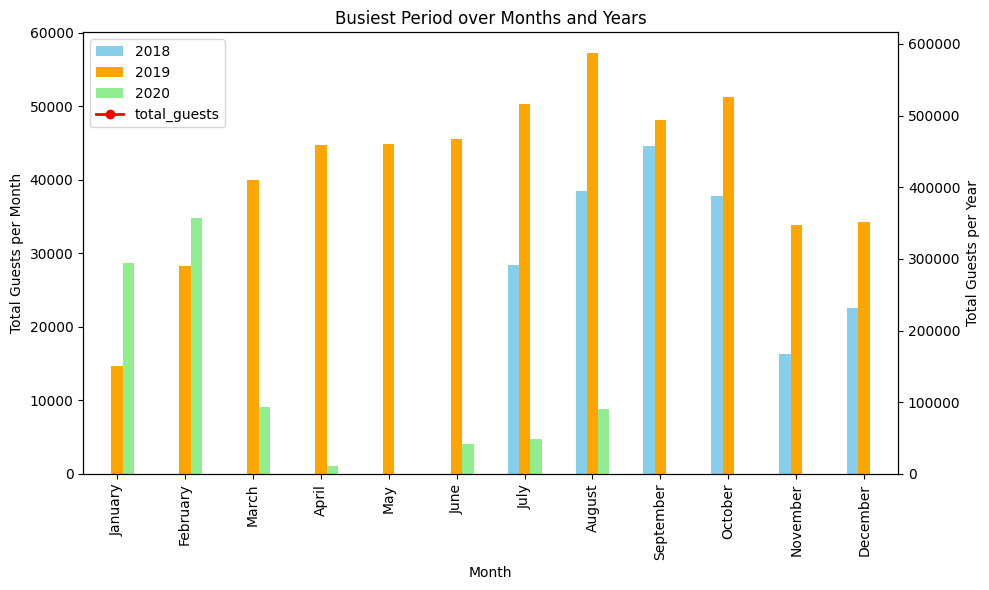

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar  # for month name formatting

df_duplicate = df
# Calculate total guests per month and year
df_duplicate['total_guests'] = (df_duplicate['adults'] + df_duplicate['children'] + df_duplicate['babies']) * (df_duplicate['stays_in_weekend_nights'] + df_duplicate['stays_in_week_nights'] + 1)

# Group by year and month, and sum total guests
monthly_guests = df_duplicate.groupby(['arrival_date_year', 'arrival_date_month'])['total_guests'].sum().reset_index()

# Specify the order of months
ordered_months = list(calendar.month_name)[1:]  # Get full month names and skip the first empty string

# Convert month to categorical with specified order
monthly_guests['arrival_date_month'] = pd.Categorical(monthly_guests['arrival_date_month'], categories=ordered_months, ordered=True)

# Pivot the data to prepare for plotting, ensuring correct month order
pivot_monthly_guests = monthly_guests.pivot(index='arrival_date_month', columns='arrival_date_year', values='total_guests')

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total guests per month
pivot_monthly_guests.plot(kind='bar', ax=ax1, color=['skyblue', 'orange', 'lightgreen'])
ax1.set_ylabel('Total Guests per Month')

# Add secondary y-axis for total guests per year
ax2 = ax1.twinx()
monthly_guests.groupby('arrival_date_year')['total_guests'].sum().plot(kind='line', marker='o', ax=ax2, color='red', linewidth=2)
ax2.set_ylabel('Total Guests per Year')

# Adjust y-axis limits for ax2 (total guests per year)
ax2.set_ylim(bottom=0, top=ax2.get_ylim()[1] * 1.2)  # Adjust multiplier as needed

# Set labels and title
ax1.set_xlabel('Month')
ax1.set_title('Busiest Period over Months and Years')

# Customize legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show plot
plt.tight_layout()  # Ensures all elements are properly placed
plt.show()


Hence, base on the visualization about it suggest that 2019 is the busiest year and that August tends to be the busiest month.

However, it is worth noting that this may not be accurate as for both 2018 & 2020, they do not capture all 12 months of the year.

### Summary of numerical metrics

In [33]:


# Select numerical columns for summary statistics
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                  'adults', 'children', 'babies', 'previous_cancellations',
                  'booking_changes', 'days_in_waiting_list', 'adr',
                  'required_car_parking_spaces', 'total_of_special_requests']

# Calculate summary statistics
summary_stats = df[numerical_cols].describe().transpose()

# Add median column explicitly (describe() provides mean by default)
summary_stats['median'] = df[numerical_cols].median()

# Display the summary statistics
print(summary_stats)

                               count       mean         std  min   25%   50%  \
lead_time                    89945.0  98.170493  106.978427  0.0  15.0  59.0   
stays_in_weekend_nights      89945.0   0.893713    0.997573  0.0   0.0   1.0   
stays_in_week_nights         89945.0   2.421724    1.908586  0.0   1.0   2.0   
adults                       89945.0   1.840547    0.606444  0.0   2.0   2.0   
children                     89945.0   0.096637    0.385434  0.0   0.0   0.0   
babies                       89945.0   0.008338    0.101671  0.0   0.0   0.0   
previous_cancellations       89945.0   0.111913    0.965653  0.0   0.0   0.0   
booking_changes              89945.0   0.211996    0.634527  0.0   0.0   0.0   
days_in_waiting_list         89945.0   2.994252   20.041803  0.0   0.0   0.0   
adr                          89945.0  94.666232   48.588466  0.0  65.0  88.0   
required_car_parking_spaces  89945.0   0.064840    0.248625  0.0   0.0   0.0   
total_of_special_requests    89945.0   0

Overview of the distribution over several key numerical metrics.

### Analyze Cancellation Trends Over Different Months and Years


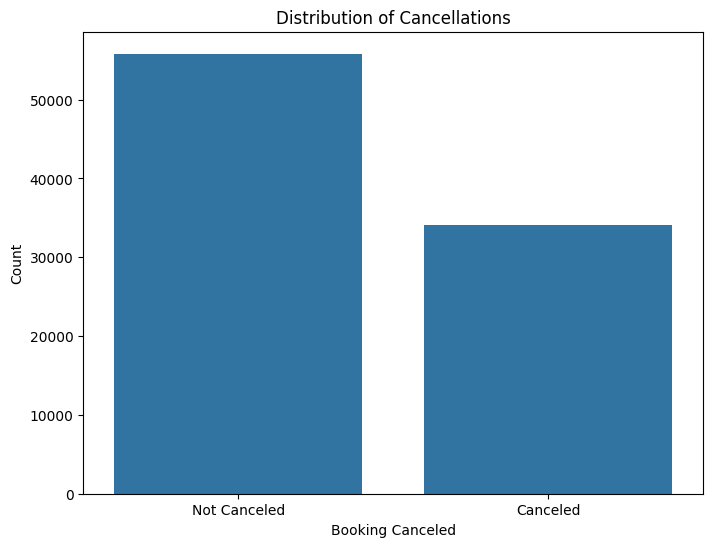

Cancellation Rate: 37.94%


In [34]:
import seaborn as sns

# Plotting the distribution of is_canceled
plt.figure(figsize=(8, 6))
sns.countplot(x='is_canceled', data=df)
plt.title('Distribution of Cancellations')
plt.xlabel('Booking Canceled')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

# Calculate cancellation rate
cancellation_rate = df['is_canceled'].mean() * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

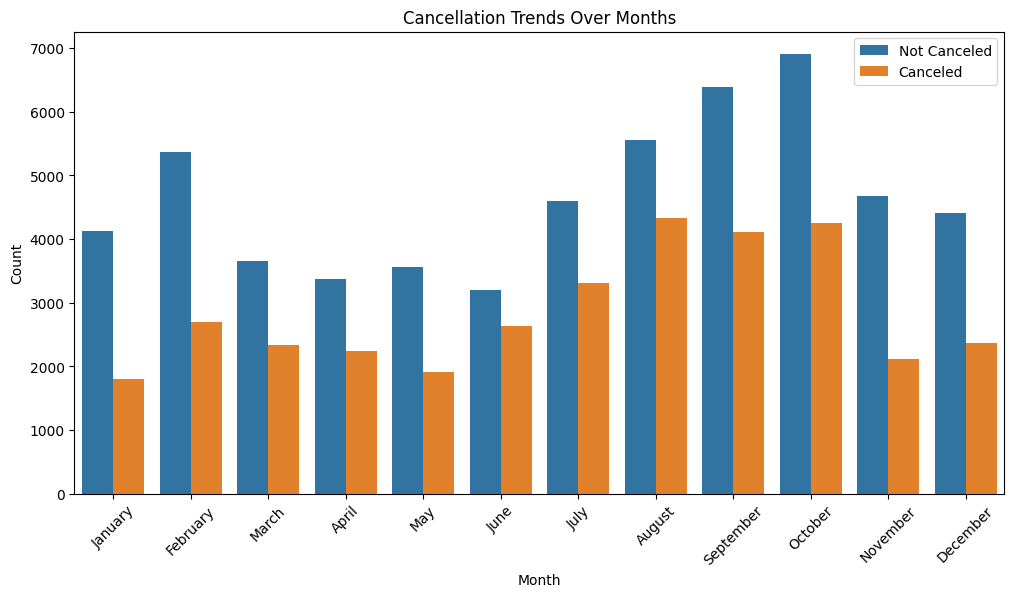

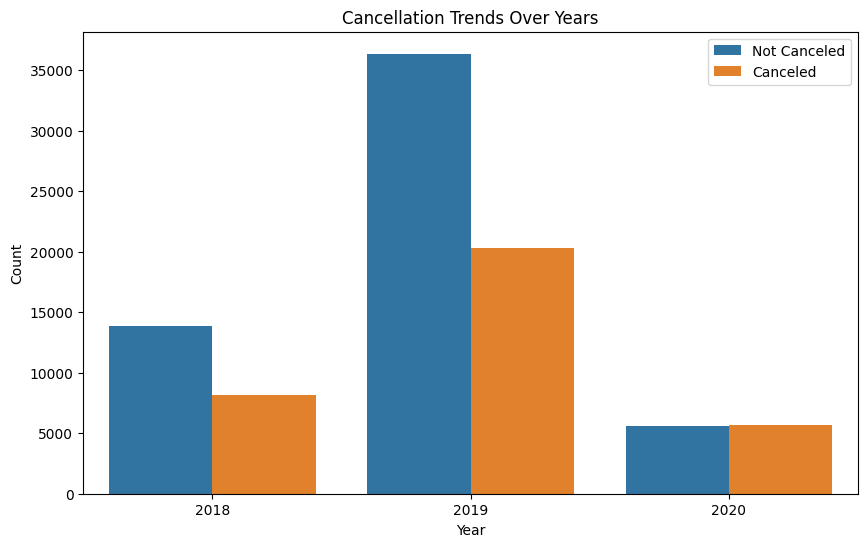

In [35]:
df_duplicate = df

# Convert arrival_date_month to categorical and sort months
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
df_duplicate['arrival_date_month'] = pd.Categorical(df_duplicate['arrival_date_month'], categories=months_order, ordered=True)

# Plot cancellation trends over months
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=df_duplicate)
plt.title('Cancellation Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

# Plot cancellation trends over years
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_year', hue='is_canceled', data=df_duplicate)
plt.title('Cancellation Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()


It seems that the busiest month and busiest year are also the ones with the highest cancellation rates.

In [36]:
df.head()

,is_nric,is_passport,membership_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests
0,True,True,True,Bristol Hotel,False,342,2018,July,27,1,...,3,No Deposit,False,False,0,Transient,0.0,0,0,2
1,True,True,True,Bristol Hotel,False,737,2018,July,27,1,...,4,No Deposit,False,False,0,Transient,0.0,0,0,2
2,True,True,False,Bristol Hotel,False,7,2018,July,27,1,...,0,No Deposit,False,False,0,Transient,75.0,0,0,2
3,True,True,False,Bristol Hotel,False,13,2018,July,27,1,...,0,No Deposit,True,False,0,Transient,75.0,0,0,2
4,True,True,False,Bristol Hotel,False,14,2018,July,27,1,...,0,No Deposit,True,False,0,Transient,98.0,0,1,6


We also drop the column of total_guests from the dataset as it is based of adults + children + babaies

In [37]:
# Drop the total_guests column
df.drop(columns=['total_guests'], inplace=True)

# Verify the columns after dropping
print(df.columns)

Index(['is_nric', 'is_passport', 'membership_id', 'hotel', 'is_canceled',
       'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


## Feature Engineering

## b. Utilise feature engineering to capture the following, but not limited to that described below, in the dataset used for modelling:
  * Boolean feature for new customers who have booked rooms in the resort on weekdays.
  * Boolean feature of singles or couples without children/babies who have booked rooms with a non-refundable deposit.
  * Propose and implement at least one additional feature with justification.

 Column creation is called [**feature engineering**](https://en.wikipedia.org/wiki/Feature_engineering), the practice of enriching your dataset with more information (either from it directly or elsewhere).

### Boolean feature for new customers who have booked rooms in the resort on weekdays.

In [38]:
from datetime import datetime

In [39]:
# Access each column individually to get their data types
print(df['arrival_date_day_of_month'].dtype)
print(df['arrival_date_month'].dtype)
print(df['arrival_date_year'].dtype)

# Or, to get the data types of multiple columns at once, use a list:
print(df[['arrival_date_day_of_month', 'arrival_date_month', 'arrival_date_year']].dtypes)

int64
category
int64
arrival_date_day_of_month       int64
arrival_date_month           category
arrival_date_year               int64
dtype: object


In [40]:
# Convert 'arrival_date_month' to string type
df['arrival_date_month'] = df['arrival_date_month'].astype(str)

In [41]:
# Access each column individually to get their data types
print(df['arrival_date_day_of_month'].dtype)
print(df['arrival_date_month'].dtype)
print(df['arrival_date_year'].dtype)

# Or, to get the data types of multiple columns at once, use a list:
print(df[['arrival_date_day_of_month', 'arrival_date_month', 'arrival_date_year']].dtypes)

int64
object
int64
arrival_date_day_of_month     int64
arrival_date_month           object
arrival_date_year             int64
dtype: object


In [42]:
# Convert arrival date to datetime format
df['arrival_date'] = pd.to_datetime(df['arrival_date_day_of_month'].astype(str) + '/' +
                                    df['arrival_date_month'] + '/' +
                                    df['arrival_date_year'].astype(str),
                                    format='%d/%B/%Y', errors='coerce')
df['arrival_date'] = df['arrival_date'].dt.strftime('%d/%m/%y')

# Remove leading zeros from day and month
df['arrival_date'] = df['arrival_date'].str.replace(r'^0', '', regex=True)
df['arrival_date'] = df['arrival_date'].str.replace(r'/0', '/', regex=True)

df.head()

,is_nric,is_passport,membership_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
0,True,True,True,Bristol Hotel,False,342,2018,July,27,1,...,3,No Deposit,False,False,0,Transient,0.0,0,0,1/7/18
1,True,True,True,Bristol Hotel,False,737,2018,July,27,1,...,4,No Deposit,False,False,0,Transient,0.0,0,0,1/7/18
2,True,True,False,Bristol Hotel,False,7,2018,July,27,1,...,0,No Deposit,False,False,0,Transient,75.0,0,0,1/7/18
3,True,True,False,Bristol Hotel,False,13,2018,July,27,1,...,0,No Deposit,True,False,0,Transient,75.0,0,0,1/7/18
4,True,True,False,Bristol Hotel,False,14,2018,July,27,1,...,0,No Deposit,True,False,0,Transient,98.0,0,1,1/7/18


In [43]:
df.dtypes

,0
is_nric,bool
is_passport,bool
membership_id,bool
hotel,object
is_canceled,bool
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64


In [44]:
# Convert to datetime, handling potential errors
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df.dtypes

<ipython-input-44-88861d12ef59>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrival_date'] = pd.to_datetime(df['arrival_date'])


,0
is_nric,bool
is_passport,bool
membership_id,bool
hotel,object
is_canceled,bool
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64


In [45]:
# Function to check if a date is a weekday (Monday to Friday)
def is_weekday(date):
    return date.weekday() < 5  # Monday = 0, ..., Friday = 4

In [46]:
# Apply the function to determine if arrival date is a weekday
df['is_weekday'] = df['arrival_date'].apply(is_weekday)

In [47]:
df.tail()

,is_nric,is_passport,membership_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,is_weekday
89940,True,True,False,Botany Hotel,True,222,2020,August,35,31,...,No Deposit,True,False,0,Transient,117.0,0,3,2020-08-31,True
89941,True,True,True,Botany Hotel,True,177,2020,August,35,31,...,No Deposit,True,False,0,Transient,95.1,0,1,2020-08-31,True
89942,True,True,True,Botany Hotel,True,131,2020,August,35,31,...,No Deposit,True,False,0,Transient,165.0,0,0,2020-08-31,True
89943,True,True,False,Botany Hotel,True,155,2020,August,35,31,...,No Deposit,True,False,0,Transient,135.0,0,1,2020-08-31,True
89944,True,True,True,Botany Hotel,True,155,2020,August,35,31,...,No Deposit,True,False,0,Transient,135.0,0,1,2020-08-31,True


In [48]:
# Create a new column for new customers on weekdays
df['is_new_customer_weekday'] = (df['previous_cancellations'] == 0) & (df['previous_bookings_not_canceled'] == 0) & df['is_weekday']

# Drop the intermediate arrival_date and is_weekday columns if no longer needed
df.drop(columns=['arrival_date'], inplace=True)
df.drop(columns=['is_weekday'], inplace=True)

In [49]:
# Display the updated DataFrame
df.head()

,is_nric,is_passport,membership_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_new_customer_weekday
0,True,True,True,Bristol Hotel,False,342,2018,July,27,1,...,3,No Deposit,False,False,0,Transient,0.0,0,0,False
1,True,True,True,Bristol Hotel,False,737,2018,July,27,1,...,4,No Deposit,False,False,0,Transient,0.0,0,0,False
2,True,True,False,Bristol Hotel,False,7,2018,July,27,1,...,0,No Deposit,False,False,0,Transient,75.0,0,0,False
3,True,True,False,Bristol Hotel,False,13,2018,July,27,1,...,0,No Deposit,True,False,0,Transient,75.0,0,0,False
4,True,True,False,Bristol Hotel,False,14,2018,July,27,1,...,0,No Deposit,True,False,0,Transient,98.0,0,1,False


### Boolean feature of singles or couples without children/babies who have booked rooms with a non-refundable deposit.


In [50]:
# Create a new column for singles or couples without children/babies with a non-refundable deposit
df['is_single_or_couple_non_refund'] = ((df['adults'].isin([1, 2])) &
                                        (df['children'] == 0) &
                                        (df['babies'] == 0) &
                                        (df['deposit_type'] == 'Non Refund'))

df.head()

,is_nric,is_passport,membership_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_new_customer_weekday,is_single_or_couple_non_refund
0,True,True,True,Bristol Hotel,False,342,2018,July,27,1,...,No Deposit,False,False,0,Transient,0.0,0,0,False,False
1,True,True,True,Bristol Hotel,False,737,2018,July,27,1,...,No Deposit,False,False,0,Transient,0.0,0,0,False,False
2,True,True,False,Bristol Hotel,False,7,2018,July,27,1,...,No Deposit,False,False,0,Transient,75.0,0,0,False,False
3,True,True,False,Bristol Hotel,False,13,2018,July,27,1,...,No Deposit,True,False,0,Transient,75.0,0,0,False,False
4,True,True,False,Bristol Hotel,False,14,2018,July,27,1,...,No Deposit,True,False,0,Transient,98.0,0,1,False,False


In [51]:
df.dtypes

,0
is_nric,bool
is_passport,bool
membership_id,bool
hotel,object
is_canceled,bool
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64


### Propose and implement at least one additional feature with justification.


### Proposed Additional Feature: "stay_duration"
Justification:
The "stay_duration" feature represents the total number of nights a guest is booked to stay at the hotel, combining both weekend and weekday nights. This feature provides insights into the length of the guest's stay, which can influence the likelihood of cancellation. Longer stays might be more prone to cancellations due to the greater commitment required, whereas shorter stays might be less likely to be canceled.

In [52]:
# Calculate stay_duration (total number of nights)
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Display the DataFrame with the new feature
df.head()

,is_nric,is_passport,membership_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_new_customer_weekday,is_single_or_couple_non_refund,stay_duration
0,True,True,True,Bristol Hotel,False,342,2018,July,27,1,...,False,False,0,Transient,0.0,0,0,False,False,0
1,True,True,True,Bristol Hotel,False,737,2018,July,27,1,...,False,False,0,Transient,0.0,0,0,False,False,0
2,True,True,False,Bristol Hotel,False,7,2018,July,27,1,...,False,False,0,Transient,75.0,0,0,False,False,1
3,True,True,False,Bristol Hotel,False,13,2018,July,27,1,...,True,False,0,Transient,75.0,0,0,False,False,1
4,True,True,False,Bristol Hotel,False,14,2018,July,27,1,...,True,False,0,Transient,98.0,0,1,False,False,2


## Build one or more machine learning model(s) utilising the provided dataset to predict reservation cancellations. We need to:

  * Provide a clear definition of reservation cancellation, i.e. which data column is to be used as the target variable and which categories are considered “cancellations”.
  * Clearly explain the steps/approach taken to build the machine learning model, including any pre-processing steps undertaken to parse strings and categorical variables, approach to feature selection (if any), additional features to be generated, training and testing procedures, the algorithm chosen, and model evaluation metrics. We may use one or more algorithms and/or perform hyperparameter tuning to improve the model performance.

## Provide a clear definition of reservation cancellation, i.e. which data column is to be used as the target variable and which categories are considered “cancellations”.

Target variable data column: **is_canceleled**

Where by for reservation cancellation:
-  is_canceleled = 1 means reservation is cancelled
-  is_canceleled = 0 means reservation is not cancelled

## Clearly explain the steps/approach taken to build the machine learning model, including any pre-processing steps undertaken to parse strings and categorical variables, approach to feature selection (if any), additional features to be generated, training and testing procedures, the algorithm chosen, and model evaluation metrics. We shall use one or more algorithms and/or perform hyperparameter tuning to improve the model performance.

### Pre-processing

Here we convert non-numerical values to numerical values (also call feature encoding)


In [53]:
# Convert some object columns to boolean and then to integers
df['is_nric'] = df['is_nric'].astype(int)
df['is_passport'] = df['is_passport'].astype(int)
df['membership_id'] = df['membership_id'].astype(int)
df['is_canceled'] = df['is_canceled'].astype(int)
df['is_canceled'] = df['is_canceled'].astype(int)
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)
df['is_new_customer_weekday'] = df['is_new_customer_weekday'].astype(int)
df['is_single_or_couple_non_refund'] = df['is_single_or_couple_non_refund'].astype(int)


In [54]:
df.dtypes

,0
is_nric,int64
is_passport,int64
membership_id,int64
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64


### Getting our data ready to be used with machine learning

Three main things we have to do:
   1. Split the data into mfeatures and labels (usually `X` & `y`)
   2. Converting non-numerical values to numerical values (also called featured encoding)

#### Split the data into mfeatures and labels (usually `X` & `y`)


In [55]:
# Split into X/y
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

In [56]:
X

,is_nric,is_passport,membership_id,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_new_customer_weekday,is_single_or_couple_non_refund,stay_duration
0,1,1,1,Bristol Hotel,342,2018,July,27,1,0,...,0,0,0,Transient,0.0,0,0,0,0,0
1,1,1,1,Bristol Hotel,737,2018,July,27,1,0,...,0,0,0,Transient,0.0,0,0,0,0,0
2,1,1,0,Bristol Hotel,7,2018,July,27,1,0,...,0,0,0,Transient,75.0,0,0,0,0,1
3,1,1,0,Bristol Hotel,13,2018,July,27,1,0,...,1,0,0,Transient,75.0,0,0,0,0,1
4,1,1,0,Bristol Hotel,14,2018,July,27,1,0,...,1,0,0,Transient,98.0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89940,1,1,0,Botany Hotel,222,2020,August,35,31,0,...,1,0,0,Transient,117.0,0,3,1,0,3
89941,1,1,1,Botany Hotel,177,2020,August,35,31,0,...,1,0,0,Transient,95.1,0,1,1,0,3
89942,1,1,1,Botany Hotel,131,2020,August,35,31,0,...,1,0,0,Transient,165.0,0,0,1,0,3
89943,1,1,0,Botany Hotel,155,2020,August,35,31,0,...,1,0,0,Transient,135.0,0,1,1,0,3


In [57]:
df.dtypes

,0
is_nric,int64
is_passport,int64
membership_id,int64
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64


#### Converting non-numerical values to numerical values (also called featured encoding)

In [58]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")


transformed_X = transformer.fit_transform(X)
transformed_X

<89945x235 sparse matrix of type '<class 'numpy.float64'>'
	with 2104733 stored elements in Compressed Sparse Row format>

### Training and Testing procedures

We do a 80:20 split between the train:test data.

Now comes one of the most important concepts in machine learning, the **training/test split**.

This is where you'll split your data into a **training set** and a **test set**.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

#### Why not use all the data to train a model?

Let's say you wanted to take your model into the hospital and start using it on patients. How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in. It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and feed it our independent and dependent variables (`X` & `y`).

In [59]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)


## 2. Choosing the right estimator/algorithm for your problem

Once you've got your data ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

Some things to note:
    
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)
* Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).

If you know what kind of problem you're working with, one of the next places you should look at is the [Scikit-Learn algorithm cheatsheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

This cheatsheet gives you a bit of an insight into the algorithm you might want to use for the problem you're working on.

It's important to remember, you don't have to explicitly know what each algorithm is doing on the inside to start using them. If you do start to apply different algorithms but they don't seem to be working, that's when you'd start to look deeper into each one.

Let's check out the cheatsheet and follow it for some of the problems we're working on.

<img src="https://scikit-learn.org/1.3/_static/ml_map.png" width=700/>



In [60]:
df.shape

(89945, 35)

### Model choices

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


"Wait, I don't see Logistic Regression and why not use LinearSVC?"

Good questions.

I was confused too when I didn't see Logistic Regression listed as well because when you read the Scikit-Learn documentation on it, you can see it's [a model for classification](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

And as for LinearSVC, we don't have a dataset size of over 100,000.


In [61]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()};

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-Learn machine models
    X_train: training  data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """

    # Set random seed
    np.random.seed(42)
    # Make a dictionary o keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [62]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7969870476402245,
 'KNN': 0.7830896659069432,
 'Random Forest': 0.8914336538996053}

### Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

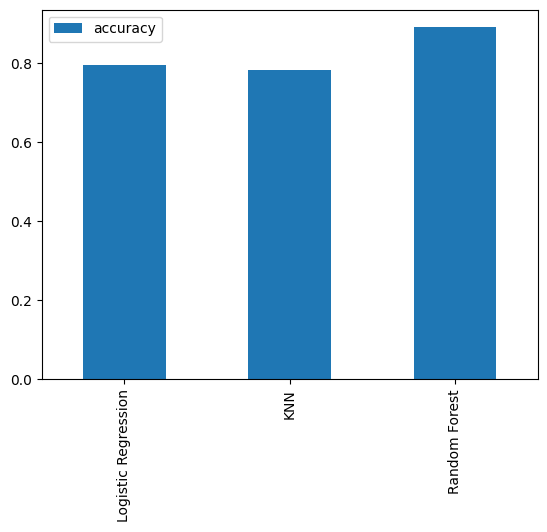

In [63]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Beautiful! We can't really see it from the graph but looking at the dictionary, the [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model performs best.

Now we've got a baseline model... and we know a model's first predictions aren't what we should based our next steps off. What should we do?

Let's look at the following:

* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

## Hyperparameter tuning and cross-validation

To cook your favourite dish, you know to set the oven to 180 degrees and turn the grill on. But when your roommate cooks their favourite dish, they set use 200 degrees and the fan-forced mode. Same oven, different settings, different outcomes.

The same can be done for machine learning algorithms. You can use the same algorithms but change the settings (hyperparameters) and get different results.

But just like turning the oven up too high can burn your food, the same can happen for machine learning algorithms. You change the settings and it works so well, it **overfits** (does too well) the data but when you introduce the test data it doesn't perform well compared to the training data.

We're looking for the goldilocks model. One which does well on our dataset but also does well on unseen examples.

To test different hyperparameters, you could use a **validation set** but since we don't have much data, we'll use **cross-validation**.

The most common type of cross-validation is *k-fold*. It involves splitting your data into *k-fold's* and then testing a model on each. For example, let's say we had 5 folds (k = 5). This what it might look like.

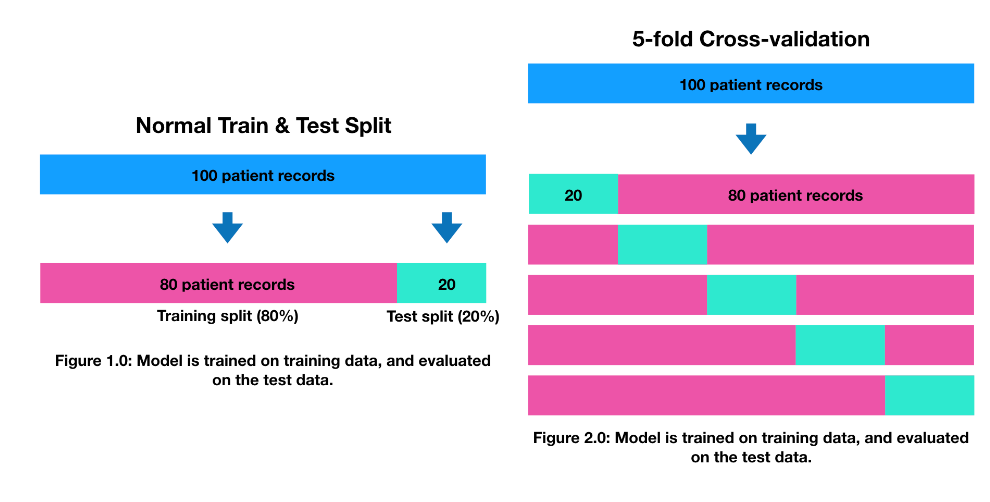
| Normal train and test split versus 5-fold cross-validation |

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like **precision**, **recall**, **F1-score** and **ROC** at the same time.

Here's the game plan:
1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

### Hyperparameter Tuning with  [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Since our RandomForestClassifier() model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [64]:
## If I had more time or computational resources I would hyperparameter tune this here

# # Different hyperparameters for our RandomForestClassifier model
# RFC_grid = {"n_estimators": np.arange(10, 1000, 50),
#            "max_depth": [None, 3, 5, 10]}

# # Setup grid hyperparameter search for RandomForestClassifier
# gs_RFC = RandomizedSearchCV(RandomForestClassifier(),
#                             param_distributions=RFC_grid,
#                             cv=5,
#                             verbose=True)

# # Assuming X_train and y_train are already defined and preprocessed
# # Fit grid hyperparameter search model
# gs_RFC.fit(X_train, y_train)

In [65]:
# gs_RFC.best_params_

In [66]:
# Evluate the grid search RandomForestClassifier model
# gs_RFC.score(X_test, y_test)

Let's try do hyperparameter tunning for the logistics regression model

In [67]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [68]:
gs_log_reg.best_params_

{'solver': 'liblinear', 'C': 2807.2162039411755}

In [69]:
# Evluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8181666574017455

Let's try do hyperparameter tunning for the KNN model

In [70]:
# ## If I had more time or computational resources I would hyperparameter tune this here

# # Different hyperparameters for our KNeighborsClassifier model
# knn_grid = {"n_neighbors": np.arange(1, 21, 2),  # Number of neighbors to consider
#             "weights": ["uniform", "distance"],  # Weighting scheme for neighbors
#             "metric": ["euclidean", "manhattan"]}  # Distance metric to use

# # Setup grid hyperparameter search for KNeighborsClassifier
# gs_knn = RandomizedSearchCV(KNeighborsClassifier(),
#                             param_distributions=knn_grid,
#                             cv=5,
#                             verbose=True)

# # Fit grid hyperparameter search model
# gs_knn.fit(X_train, y_train)

In [71]:
# gs_knn.best_params_

In [72]:
# Evluate the grid search KNeighborsClassifier model
# gs_knn.score(X_test, y_test)

### Results after hyperparameter tuning

Shows than Random Forest is the best model.

In [73]:
# Evluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8181666574017455

In [74]:
model_scores

{'Logistic Regression': 0.7969870476402245,
 'KNN': 0.7830896659069432,
 'Random Forest': 0.8914336538996053}

## Evaluating our tuned machine learning classifier, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:
* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

...and it would be great if cross-validation was used where possible.

Luckily, Scikit-Learn has these all built-in.

To access them, we'll have to use our model to make predictions on the test set. You can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data. To make comparisons and evaluate our trained model, first we need to make predictions.

In [75]:
# Make predictions with best tuned model
y_preds = models["Random Forest"].predict(X_test)

Let's see them.

In [76]:
y_preds

array([0, 0, 0, ..., 1, 0, 0])

In [77]:
y_test

,is_canceled
1807,0
83995,0
48000,0
35767,0
52787,1
...,...
52757,0
17826,0
40165,1
52205,0


Since we've got our prediction values we can find the metrics we want.

Let's start with the ROC curve and AUC scores.

### ROC Curve and AUC Scores

What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person is predicted to cancel their booking, but does not actually cancel their booking. A false negative, on the other hand, occurs when the person is predicted not to cancel their booking when in reality they cancelled their booking. As much as possible the hotel would rather have a false negative case compared to a false positive case.

Scikit-Learn implements a function `plot_roc_curve` which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the [`plot_roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html) function we can see it takes `(estimator, X, y)` as inputs. Where `estiamator` is a fitted machine learning model and `X` and `y` are the data you'd like to test it on.

In our case, we'll use the GridSearchCV version of our `LogisticRegression` estimator, `gs_log_reg` as well as the test data, `X_test` and `y_test`.

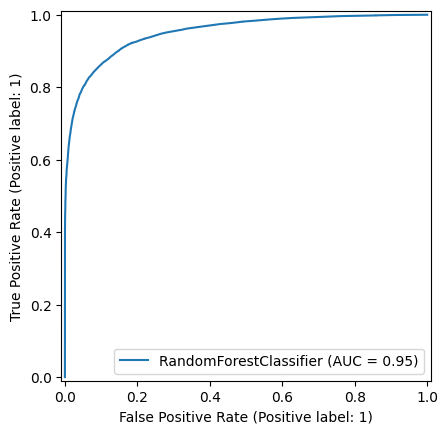

In [78]:
# Scikit-Learn 1.2.0 or later
from sklearn.metrics import RocCurveDisplay

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator= models["Random Forest"],
                               X=X_test,
                               y=y_test);

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

### Confusion matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and passing it the true labels and predicted labels.

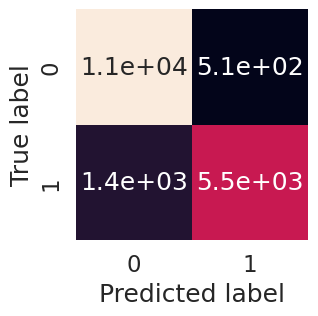

In [79]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis

plot_conf_mat(y_test, y_preds)

* **True label 0, Predicted label 0** (Top-left: 1.1e+04): The model correctly predicted 11,000 bookings as not canceled (true negatives).
* **True label 0, Predicted label 1** (Top-right: 5.4e+02): The model incorrectly predicted 540 bookings as canceled when they were actually not canceled (false positives).
* **True label 1, Predicted label 0** (Bottom-left: 1.4e+03): The model incorrectly predicted 1,400 bookings as not canceled when they were actually canceled (false negatives).
* **True label 1, Predicted label 1** (Bottom-right: 5.5e+03): The model correctly predicted 5,500 bookings as canceled (true positives).

### Interpreting the confusion matrix

* **False Positives (540 cases)**: These are instances where the model predicts that a booking will be canceled, but the booking is actually not canceled. In a hotel context, this might mean the hotel mistakenly considers these bookings as cancellations and could potentially release the reserved rooms to other guests or take unnecessary actions to mitigate the perceived cancellations.
* **False Negatives (1400 cases)**: These are instances where the model predicts that a booking will not be canceled, but the booking is actually canceled. In this scenario, the hotel may hold rooms for guests who end up not showing up, leading to lost revenue opportunities from other potential bookings.

### Business Impact and Preference

**1. False Positives:**

* **Impact**: Rooms that were not going to be canceled are erroneously marked as canceled. This can lead to the hotel overbooking or rebooking rooms unnecessarily, potentially causing operational inefficiencies, guest dissatisfaction, or the need for compensation if the overbooked guests have to be relocated.
* **Mitigation**: Hotels may manage this by having flexible overbooking strategies and clear communication with guests.

**2. False Negatives:**

* **Impact**: Rooms are held for guests who end up canceling. This can lead to rooms remaining empty, resulting in lost revenue as those rooms could have been sold to other guests. This directly impacts the hotel’s bottom line.
* **Mitigation**: Hotels often manage this risk with last-minute deals, walk-in customers, or dynamic pricing strategies.

### Hotel's Preference
Given the choice between false positives and false negatives, a hotel would generally prefer false positives over false negatives. Here's why:

* **False Positives** lead to operational inconveniences and the potential need to manage overbooked rooms, but these issues are often manageable through established processes like overbooking strategies and guest communication.

* **False Negatives** lead to direct revenue loss because rooms that could have been sold to other guests remain empty. This lost revenue is harder to recover and has a more immediate and tangible impact on the hotel's financial performance.

Therefore, while both types of errors have their drawbacks, false negatives are usually more detrimental to a hotel's revenue and profitability. Reducing false negatives would be more critical for the hotel to ensure optimal room occupancy and revenue management.




### Classification report

We can make a classification report using [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [80]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     11058
           1       0.91      0.79      0.85      6931

    accuracy                           0.89     17989
   macro avg       0.90      0.87      0.88     17989
weighted avg       0.89      0.89      0.89     17989



What's going on here?

Let's get a refresh.

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

The final thing to check off the list of our model evaluation techniques is feature importance.

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to seach for "(MODEL NAME) feature importance".

For our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".

Since we're using `LogisticRegression`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the `coef_` attribute. Looking at the [Scikit-Learn documentation for `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the `coef_` attribute is the coefficient of the features in the decision function.

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression`.

Let's find the feature importance for our LogisticRegression model...

In [81]:
df.head()

,is_nric,is_passport,membership_id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_new_customer_weekday,is_single_or_couple_non_refund,stay_duration
0,1,1,1,Bristol Hotel,0,342,2018,July,27,1,...,0,0,0,Transient,0.0,0,0,0,0,0
1,1,1,1,Bristol Hotel,0,737,2018,July,27,1,...,0,0,0,Transient,0.0,0,0,0,0,0
2,1,1,0,Bristol Hotel,0,7,2018,July,27,1,...,0,0,0,Transient,75.0,0,0,0,0,1
3,1,1,0,Bristol Hotel,0,13,2018,July,27,1,...,1,0,0,Transient,75.0,0,0,0,0,1
4,1,1,0,Bristol Hotel,0,14,2018,July,27,1,...,1,0,0,Transient,98.0,0,1,0,0,2


In [82]:
# Fit an instance of RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in it's current form, this `coef_` array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [83]:
# Match feature importances to columns
feature_dict = dict(zip(df.columns, clf.feature_importances_))
feature_dict

{'is_nric': 0.0070057045649060375,
 'is_passport': 0.006719663808965968,
 'membership_id': 0.003562069150593547,
 'hotel': 0.005952864205609418,
 'is_canceled': 0.003533614405733295,
 'lead_time': 0.004987475991790548,
 'arrival_date_year': 0.0035154293151069844,
 'arrival_date_month': 0.005426219235193478,
 'arrival_date_week_number': 0.004080362637169733,
 'arrival_date_day_of_month': 0.004152000810571383,
 'stays_in_weekend_nights': 0.003374463632328724,
 'stays_in_week_nights': 0.003445866049835263,
 'adults': 0.004715079272594662,
 'children': 0.004549107563036398,
 'babies': 0.006686312177436447,
 'meal': 0.0011094498890383572,
 'country': 0.0048407026505346415,
 'market_segment': 0.004369669279417804,
 'distribution_channel': 3.243097213096552e-06,
 'previous_cancellations': 0.00039005352511333786,
 'previous_bookings_not_canceled': 1.8871765760171205e-06,
 'reserved_room_type': 4.732528723702811e-06,
 'assigned_room_type': 7.053245031471596e-06,
 'booking_changes': 0.0001097389

Now we've match the feature coefficients to different features, let's visualize them.

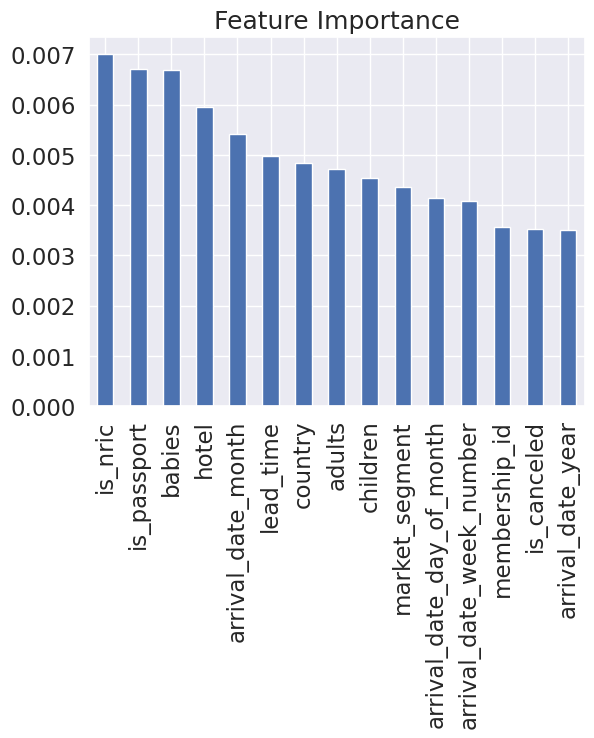

In [84]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.sort_values(by=0, ascending=False).head(15).plot.bar(title="Feature Importance", legend=False);

You'll notice some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

* From what we can see we it seems that is_passport has a higher likelihood of leading to a hotel booking cancellation. Meaning foreigners of Singapore are more prone to cancelling bookings.

* Also is_nric is also pretty high suggesting that Singaporeans too are prone to cancelling bookings but not so much as compared to foreigners.

* Also, guest with babies are also high suggesting that due to unforeseen circumstances when handling babies. This may result in cancellation of hotel bookings.

* Also, whether the hotel is Bristol or Botanical hotel it is likely to have an impact on the cancellations. Suggesting one hotel has a more pertinent issue than the other.

* Also, arrival date of the month has a large impact on cancellations depend on the time of the month. But using periods closer to the start of the month as an example many people receive their salaries at the end or beginning of the month, influencing their ability to book or cancel trips based on their financial situation.